## Исходные данные

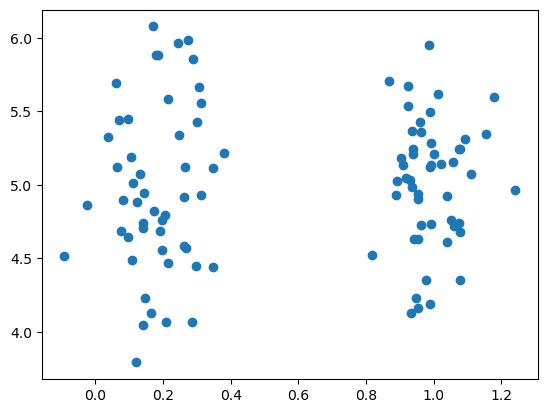

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import sklearn
import random
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
np.random.seed(0)
n_samples = 100 #Количество точек
random_state = 3
k=2 #Количество кластеров
n=100
dim=2

# Вариант 5

centers = [(0.2, 5), (1, 5)] #Центры кластеров
blobs = make_blobs(n_samples=n_samples,
                             centers=centers,
                             cluster_std=[(0.1, 0.5), (0.09, 0.5)],
                             random_state=random_state)
bl = blobs[0] 
plt.scatter(bl[:, 0], bl[:, 1], marker='o')



## Алгоритм, реализованный scikit-learn

In [2]:

X = np.array(bl)
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_ # kmeans.labels_

array([[0.44536149, 4.57585329],
       [0.71349007, 5.36525078]])

## Пользовательский алгоритм k-means

In [3]:

def data_distribution(array, cluster):
	cluster_content = [[] for i in range(k)]

	for i in range(n):
		min_distance = float('inf')
		situable_cluster = -1
		for j in range(k):
			distance = 0
			for q in range(dim):
				distance += (array[i][q]-cluster[j][q])**2

			distance = distance**(1/2)
			if distance < min_distance:
				min_distance = distance
				situable_cluster = j

		cluster_content[situable_cluster].append(array[i])

	return cluster_content

def cluster_update(cluster, cluster_content, dim):
	k = len(cluster)
	for i in range(k): #по i кластерам
		for q in range(dim): #по q параметрам
			updated_parameter = 0
			for j in range(len(cluster_content[i])):
				updated_parameter += cluster_content[i][j][q]
			if len(cluster_content[i]) != 0:
				updated_parameter = updated_parameter / len(cluster_content[i])
			cluster[i][q] = updated_parameter
	return cluster




cluster = [[0.2, 5], [1, 5]]
cluster_content = [[] for i in range(k)]
cluster_content = data_distribution(bl, cluster)
privious_cluster = copy.deepcopy(cluster)
while 1:
	cluster = cluster_update(cluster, cluster_content, dim)
	cluster_content = data_distribution(bl, cluster)
	if cluster == privious_cluster:
		print(cluster) # cluster_content
		break
	privious_cluster = copy.deepcopy(cluster)

[[0.18348125268852747, 4.973956662151301], [0.9914580181736945, 5.014511258876883]]


In [20]:
#def visualisation_2d(cluster_content):
#
#	k = 2
#	plt.grid() 
#	plt.xlabel("x")    
#	plt.ylabel("y")
#
#	for i in range(k): 
#		x_coordinates = []
#		y_coordinates = []
#		for q in range(len(cluster_content[i])):
#			x_coordinates.append(cluster_content[i][q][0])
#			y_coordinates.append(cluster_content[i][q][1])
#		plt.scatter(x_coordinates, y_coordinates)
#	plt.show()

## Вывод

Алгоритм,исползованный scikit-learn, является более точным, чем реализованный самостоятельно алгоритм, однако значения алгоритмов близки, что говорит о правильности реализации второго алгоритма. 

В случае уеньшения дисперсии при задании начального множества точек, второй алгоритм выдаёт более точные результаты (более приближенные к первому алгоритму).
